In [52]:
%pylab inline
%load_ext autoreload
%autoreload 1
%aimport pdet

import gc
import fpfs
import fitsio
import pltutil
import numpy as np
import numpy.lib.recfunctions as rfn
import matplotlib.pylab as plt

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/lustre/work/xiangchong.li/ana/miniconda3/envs/cosmosis-mpich/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# merge data from n fields
out1=[]
out2=[]
for _i in range(1000):
    _a1=fitsio.read('../../sim/src_basicCenter-var4em3/psf60/fpfs-det-%04d-g1-0000.fits' %_i)
    _a2=fitsio.read('../../sim/src_basicCenter-var4em3/psf60/fpfs-det-%04d-g1-2222.fits' %_i)
    out1.append(_a1)
    out2.append(_a2)

In [3]:
out1 =   rfn.stack_arrays(out1,usemask=False)
out2 =   rfn.stack_arrays(out2,usemask=False)
mm1=(out1['pdet_y']%64-32)**2.+(out1['pdet_y']%64-32)**2.<25
mm2=(out2['pdet_y']%64-32)**2.+(out2['pdet_y']%64-32)**2.<25
print(np.sum(mm1)/len(mm1))
out1=out1[mm1]
out2=out2[mm2]
ell1=fpfs.fpfsBase.fpfsM2E(out1,const=2000,rev=True)
ell2=fpfs.fpfsBase.fpfsM2E(out2,const=2000,rev=True)
del mm1,mm2
gc.collect()
out1=pdet.make_detection_array(out1,ell1)
out2=pdet.make_detection_array(out2,ell2)
gc.collect()

0.9642525311525051


0

In [42]:
if tt != (2,2):
    xlabel=r'$I_{\rm peak}-I_{\Delta_{%d%d}}$' %(tt[0]-2,tt[1]-2)
    dshift =-0.2
else:
    xlabel=r'$I_{\rm peak}$'
    dshift =0.05

In [66]:
y1=[]
y2=[]
x=[]
tt=(2,2)
pn='f%d%d' %tt
if tt != (2,2):
    xlabel=r'$I_{\rm peak}-I_{\Delta_{%d%d}}$' %(tt[0]-2,tt[1]-2)
    dshift =-0.2
else:
    xlabel=r'$I_{\rm peak}$'
    dshift =0.05

dcc=0.01

for i in range(0,10):
    cut=0.1*(i+2)+dshift
    msk1 = out1['pdet_%s' %pn]>cut
    outM1=out1[msk1]
    ellM1=ell1[msk1]
    msk2 = out2['pdet_%s' %pn]>cut
    outM2=out2[msk2]
    ellM2=ell2[msk2]
    
    if False:
        pnU=pn
        cor1 = pdet.get_detbias(outM1,cut,dcc,inds=tt,dcutz=False)[0]
        cor2 = pdet.get_detbias(outM2,cut,dcc,inds=tt,dcutz=False)[0]
    else:
        pnU=pn+'_all'
        cor1 = pdet.get_detbias(outM1,cut,dcc)[0]
        cor2 = pdet.get_detbias(outM2,cut,dcc)[0]
    de   = np.sum(ellM2['fpfs_e1'])-np.sum(ellM1['fpfs_e1'])
    rave = (np.sum(ellM2['fpfs_RE'])+np.sum(ellM1['fpfs_RE']))/2.
    raveR= (np.sum(ellM2['fpfs_RE'])+np.sum(ellM1['fpfs_RE'])+cor1+cor2)/2.
    print(de/raveR/0.04-1)
    x.append(cut)
    y1.append(de/rave/0.04-1)
    y2.append(de/raveR/0.04-1)
    del msk1,msk2,outM1,ellM1,outM2,ellM2
gc.collect()
x=np.array(x)/np.sqrt(4e-3)
y1=np.array(y1)
y2=np.array(y2)

0.06149683780942339
0.05316836814342918
0.04588376094080027
0.03904165307565188
0.03180433766673296
0.026572753147518613
0.021446429069100992
0.018698505458869752
0.015322899394901057
0.012533005890250859


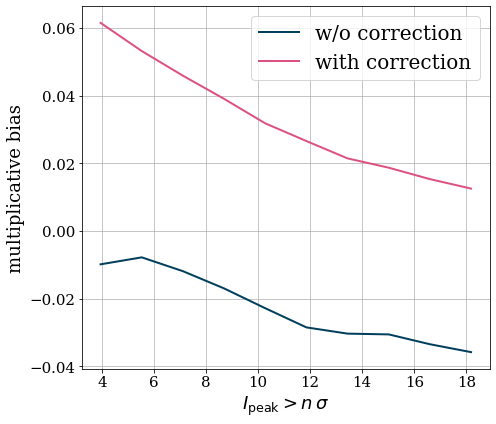

In [67]:
plt.close()
fig,axes=pltutil.make_figure_axes(1,1)
ax=axes[0]
ax.plot(x,y1,label='w/o correction',color=pltutil.colors[0])
ax.plot(x,y2,label='with correction',color=pltutil.colors[1])
ax.set_xlabel(xlabel+r'$>n\,\sigma$')
ax.set_ylabel('multiplicative bias')
#ax.set_ylim(-0.05,0.01)
ax.grid()
ax.legend()
plt.tight_layout()
#fig.savefig('../html/noisy_detection_%s.png' %pnU)

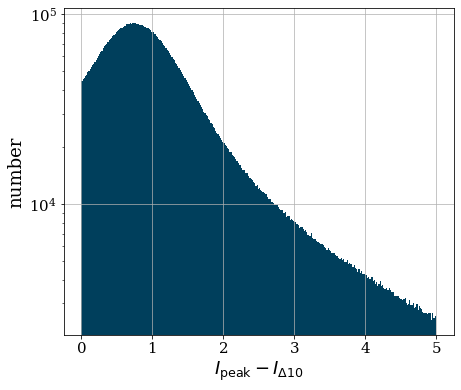

In [14]:
plt.close()
fig,axes=pltutil.make_figure_axes(1,1)
ax=axes[0]
ax.hist(out1['pdet_f12']/np.sqrt(4e-3),range=(0,5),bins=300,color=pltutil.colors[0])
ax.set_yscale('log')
ax.set_xlabel(xlabel)
ax.set_ylabel('number')
ax.grid()